In [1]:
#파생변수 추가하기

In [2]:
import pandas as pd

In [3]:
# data source: 광고정보센터(https://www.adic.or.kr/)
df = pd.read_csv("./2020_06_광고주광고비.csv")  

In [4]:
df.head()

회사명        TV     라디오       신문      잡지          전체
0  삼성전자   9894934  329710  8335219  552800  19112663.0
1  LG전자  14413117       0  1576000   99500  16088617.0
2    KT   3056007   67796  2745412   41000   5910215.0
3  동국제약   5747512       0        0   79000   5826512.0
4  기업은행   1694330       0  3079609   48500   4822439.0

### 칼럼을 삭제 후에 추가 해보자  
  

In [5]:
df = df.drop(columns = ['전체']) 

In [6]:
df.head()

회사명        TV     라디오       신문      잡지
0  삼성전자   9894934  329710  8335219  552800
1  LG전자  14413117       0  1576000   99500
2    KT   3056007   67796  2745412   41000
3  동국제약   5747512       0        0   79000
4  기업은행   1694330       0  3079609   48500

In [7]:
df['전체1'] = df.TV+df.라디오+df.신문+df.잡지

In [8]:
df.head()

회사명        TV     라디오       신문      잡지       전체1
0  삼성전자   9894934  329710  8335219  552800  19112663
1  LG전자  14413117       0  1576000   99500  16088617
2    KT   3056007   67796  2745412   41000   5910215
3  동국제약   5747512       0        0   79000   5826512
4  기업은행   1694330       0  3079609   48500   4822439

In [9]:
total = df['TV'].sum() #열의 총합 구해보자
print ("TV column sum:",total)

TV column sum: 183299007


In [10]:
# 광고비_평균을 구해, 칼럼을 추가
df['광고비_평균'] = (df.TV+df.라디오+df.신문+df.잡지)/4

In [11]:
df.head()

회사명        TV     라디오       신문      잡지       전체1      광고비_평균
0  삼성전자   9894934  329710  8335219  552800  19112663  4778165.75
1  LG전자  14413117       0  1576000   99500  16088617  4022154.25
2    KT   3056007   67796  2745412   41000   5910215  1477553.75
3  동국제약   5747512       0        0   79000   5826512  1456628.00
4  기업은행   1694330       0  3079609   48500   4822439  1205609.75

# 조건에 따른 다른 값을 부여하는 칼럼을 추가

In [12]:
# https://www.delftstack.com/ko/howto/python-pandas/how-to-create-dataframe-column-based-on-given-condition-in-pandas/

## matplotlib 설정을 먼저 한다. 가이드를 제시한다. 윈도우를 기준으로 한다.

In [ ]:
# 하고자 하는 미션은 회사별 광고비 총액(df['전체1'])을 기준으로 3가지로 분류하려 한다.
# 대, 중, 소와 같은 행태로 분류라려 한다.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
print(df['전체1'].describe())

count    5.000000e+02
mean     6.913102e+05
std      1.386596e+06
min      8.420700e+04
25%      1.342858e+05
50%      2.636565e+05
75%      6.839808e+05
max      1.911266e+07
Name: 전체1, dtype: float64


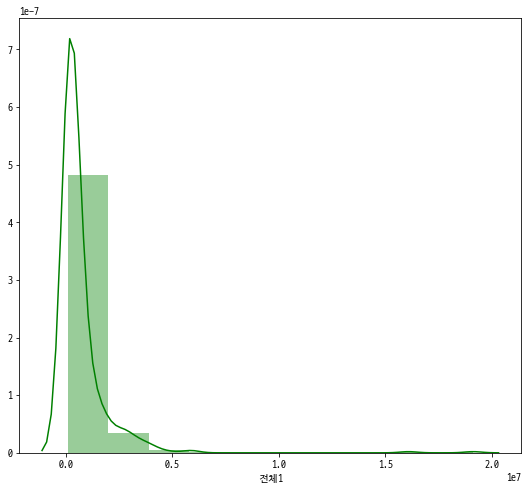

In [19]:
plt.figure(figsize=(9, 8))
sns.distplot(df['전체1'], color='g', bins=10, hist_kws={'alpha': 0.4});

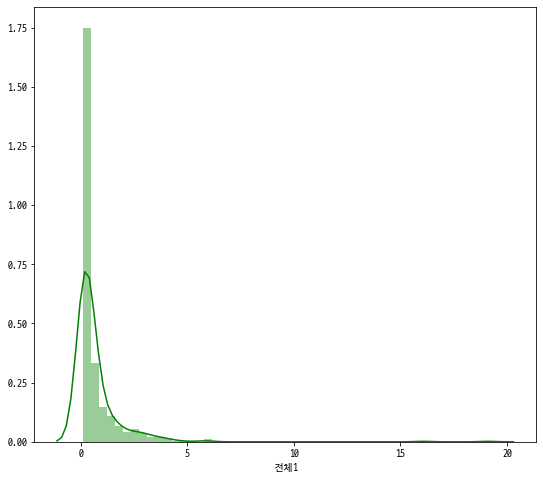

In [22]:
# 숫자가 크서 가독성이 떨어진다. 백만원으로 나누어 준다.
plt.figure(figsize=(9, 8))
sns.distplot(df['전체1']/1000000, color='g', bins=50, hist_kws={'alpha': 0.4});

In [ ]:
# 조건에 따른 다른 값을 부여하는 칼럼을 추가

In [ ]:
4000000 이상
1000000 이상 ~ 4000000 미만
1000000 미만

In [24]:
import numpy as np

In [25]:
conditionlist = [
    (df['전체1'] >= 4000000) ,
    (df['전체1'] >= 1000000) & (df['전체1'] <4000000),
    (df['전체1'] < 1000000)]
category = ['High', 'Mid', 'Low']
df['광고비_규모_구분'] = np.select(conditionlist, category, default='Not Specified')

In [26]:
df.head()

회사명        TV     라디오       신문      잡지       전체1      광고비_평균 광고비_규모_구분
0  삼성전자   9894934  329710  8335219  552800  19112663  4778165.75      High
1  LG전자  14413117       0  1576000   99500  16088617  4022154.25      High
2    KT   3056007   67796  2745412   41000   5910215  1477553.75      High
3  동국제약   5747512       0        0   79000   5826512  1456628.00      High
4  기업은행   1694330       0  3079609   48500   4822439  1205609.75      High

In [27]:
df['광고비_규모_구분'].value_counts() # 4000000 이상이 8개 업체다

Low     414
Mid      78
High      8
Name: 광고비_규모_구분, dtype: int64

In [28]:
df['광고비_규모_구분'].value_counts(normalize=True)

Low     0.828
Mid     0.156
High    0.016
Name: 광고비_규모_구분, dtype: float64

# 06_집단별로 요약하기

In [31]:
df.head()

회사명        TV     라디오       신문      잡지       전체1      광고비_평균 광고비_규모_구분
0  삼성전자   9894934  329710  8335219  552800  19112663  4778165.75      High
1  LG전자  14413117       0  1576000   99500  16088617  4022154.25      High
2    KT   3056007   67796  2745412   41000   5910215  1477553.75      High
3  동국제약   5747512       0        0   79000   5826512  1456628.00      High
4  기업은행   1694330       0  3079609   48500   4822439  1205609.75      High

In [43]:
df_sum = df.groupby('광고비_규모_구분').sum().reset_index(drop=False) #집단별 합계 산출

In [44]:
df_sum

광고비_규모_구분        TV       라디오        신문       잡지        전체1       광고비_평균
0      High  45576058    505656  17251376   829300   64162390  16040597.50
1       Low  47794156  12117320  56773062  5615357  122299895  30574973.75
2       Mid  89928793   3045558  63588028  2630440  159192819  39798204.75

In [45]:
df_mean = df.groupby('광고비_규모_구분').mean().reset_index(drop=False) # 평균 산출

In [46]:
df_mean

광고비_규모_구분            TV           라디오            신문             잡지  \
0      High  5.697007e+06  63207.000000  2.156422e+06  103662.500000   
1       Low  1.154448e+05  29268.888889  1.371330e+05   13563.664251   
2       Mid  1.152933e+06  39045.615385  8.152311e+05   33723.589744   

            전체1        광고비_평균  
0  8.020299e+06  2.005075e+06  
1  2.954104e+05  7.385259e+04  
2  2.040934e+06  5.102334e+05